# Graphe représentant les acteurs et réalisateurs qui ont travaillé ensemble

## Chargement du jeu de données IMDB Small

In [1]:
import pandas as pd
import networkx as nx

PATH_TO_DATASETS = '../datasets/'

# Load the smaller IMDb dataset
df = pd.read_csv(PATH_TO_DATASETS + 'raw_data/imdb_small.csv')

# Create the graph
G = nx.Graph()

# Add nodes and edges
for index, row in df.iterrows():
    director = row['Director']
    stars = [row['Star1'], row['Star2'], row['Star3'], row['Star4']]

    # Add the director to the graph if not already present
    if not G.has_node(director):
        G.add_node(director, type='director')

    for star in stars:
        if pd.notna(star):  # Check if the star value is not NaN
            # Add the actor to the graph if not already present
            if not G.has_node(star):
                G.add_node(star, type='actor')

            # Add an edge between the director and the actor
            G.add_edge(director, star)

# Display the number of nodes and edges for validation
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 3202
Number of edges: 3729


### Affichage du graphe

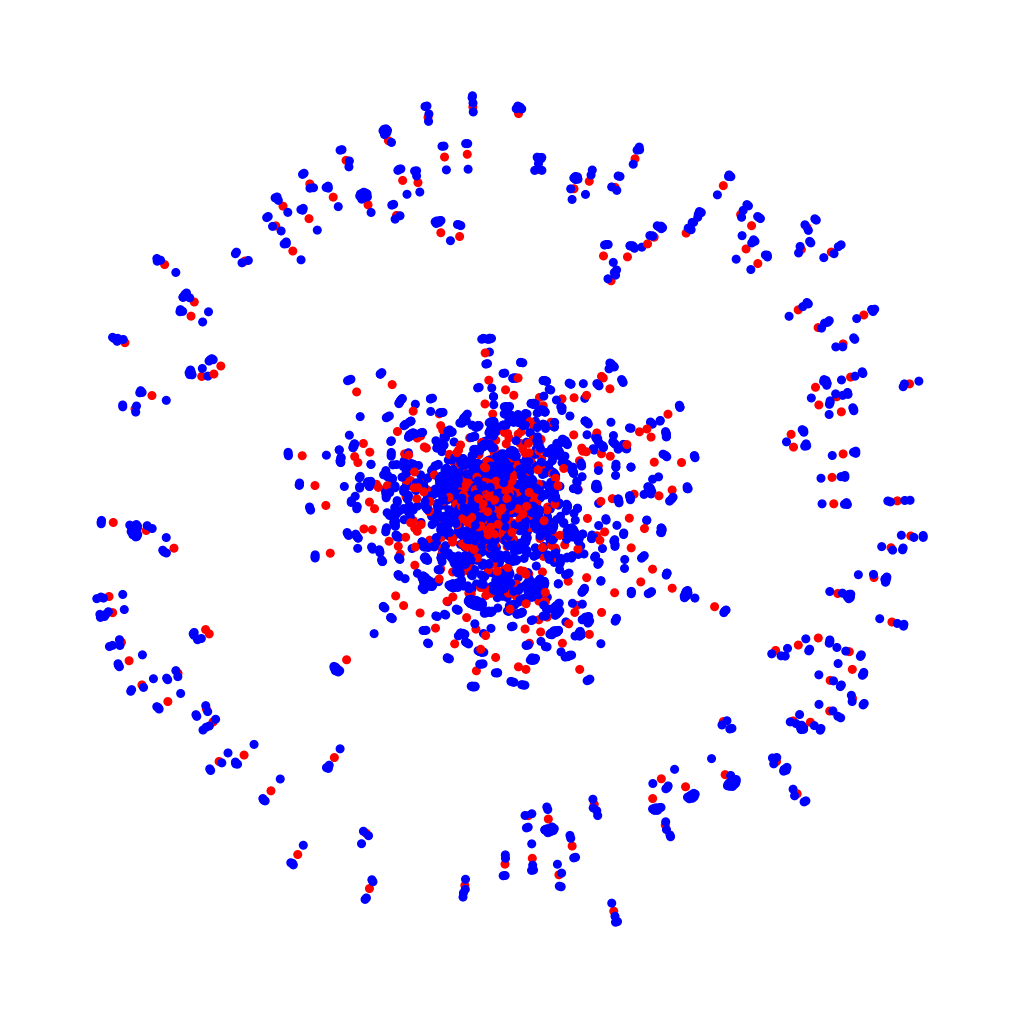

In [10]:
# Display the graph

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
node_color = ['red' if G.nodes[node]['type'] == 'director' else 'blue' for node in G.nodes]
nx.draw(G, pos, with_labels=False, node_color=node_color, node_size=30, edge_color='white')
plt.show()

In [ ]:
# Save the graph
nx.write_graphml(G, 'directors_actors.graphml')

# Graphes de co-occurences des acteurs par genre

### Récupération de tous les différents genres

In [11]:
distinct_genres = set()
for index, row in df.iterrows():
    genres = row['Genre'].split(',')
    for genre in genres:
        distinct_genres.add(genre.strip())

### Création des graphes par genre

In [15]:
import networkx as nx

graphs = []

nb_movies_per_genre = {}

for genre in distinct_genres:
    nb_movies_per_genre[genre] = 0
    G = nx.Graph()
    for index, row in df.iterrows():
        if genre in [g.strip() for g in row['Genre'].split(',')]:
            nb_movies_per_genre[genre] += 1
            
            stars = [row['Star1'], row['Star2'], row['Star3'], row['Star4']]

            for star in stars:
                if pd.notna(star):  # Check if the star value is not NaN
                    # Add the actor to the graph if not already present
                    if not G.has_node(star):
                        G.add_node(star, type='actor')

            # Add an edge between the actors
            for i in range(len(stars)):
                for j in range(i + 1, len(stars)):
                    if pd.notna(stars[i]) and pd.notna(stars[j]):
                        G.add_edge(stars[i], stars[j])
                        

    graphs.append((genre, G))

In [16]:
print(f"Number of distinct genres: {len(distinct_genres)}")
print(distinct_genres)

Number of distinct genres: 21
{'Fantasy', 'Animation', 'Drama', 'Sci-Fi', 'Western', 'Mystery', 'Family', 'Comedy', 'Crime', 'Action', 'Thriller', 'Biography', 'War', 'Music', 'Sport', 'Film-Noir', 'Musical', 'Adventure', 'History', 'Romance', 'Horror'}


### Affichage du nombre de films par genre

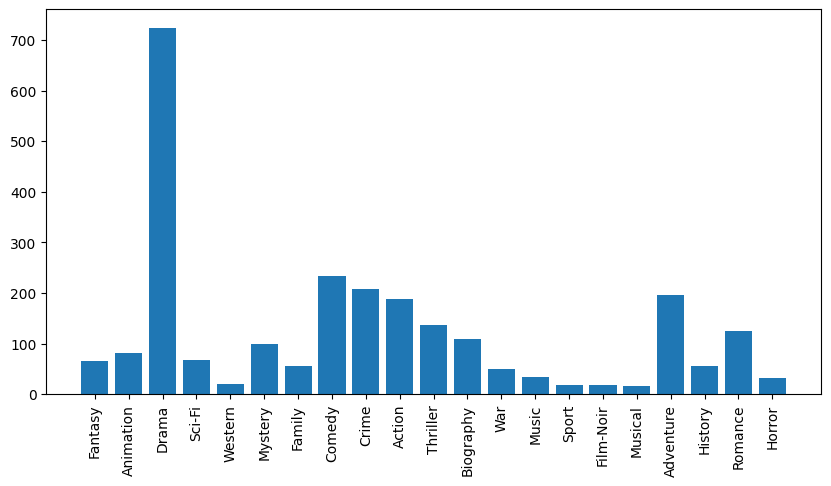

In [20]:
# Histogramme du nombre de films par genre
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(nb_movies_per_genre.keys(), nb_movies_per_genre.values())
plt.xticks(rotation=90)
plt.show()

### Affichage des graphes

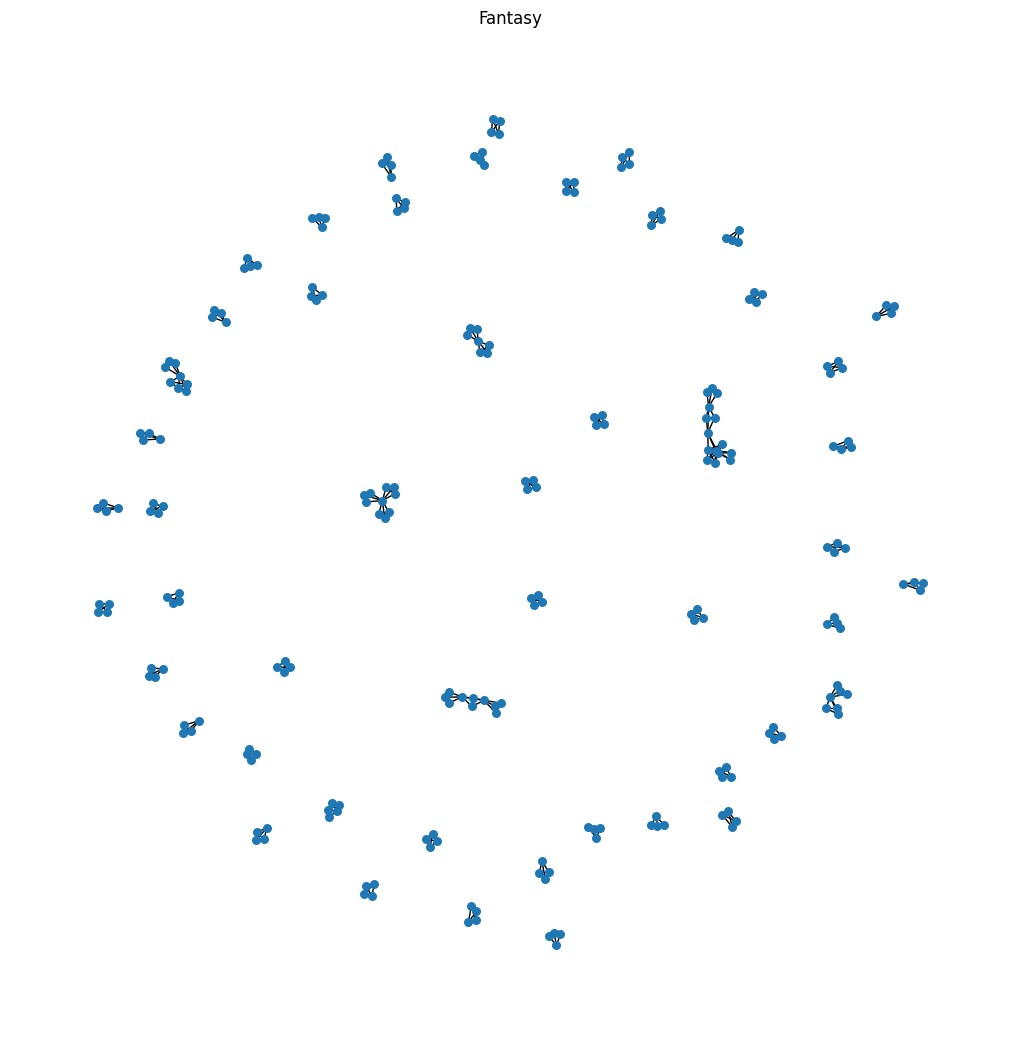

Graph Fantasy - Number of movies: 66
Graph Fantasy - Number of nodes: 234
Graph Fantasy - Number of edges: 374


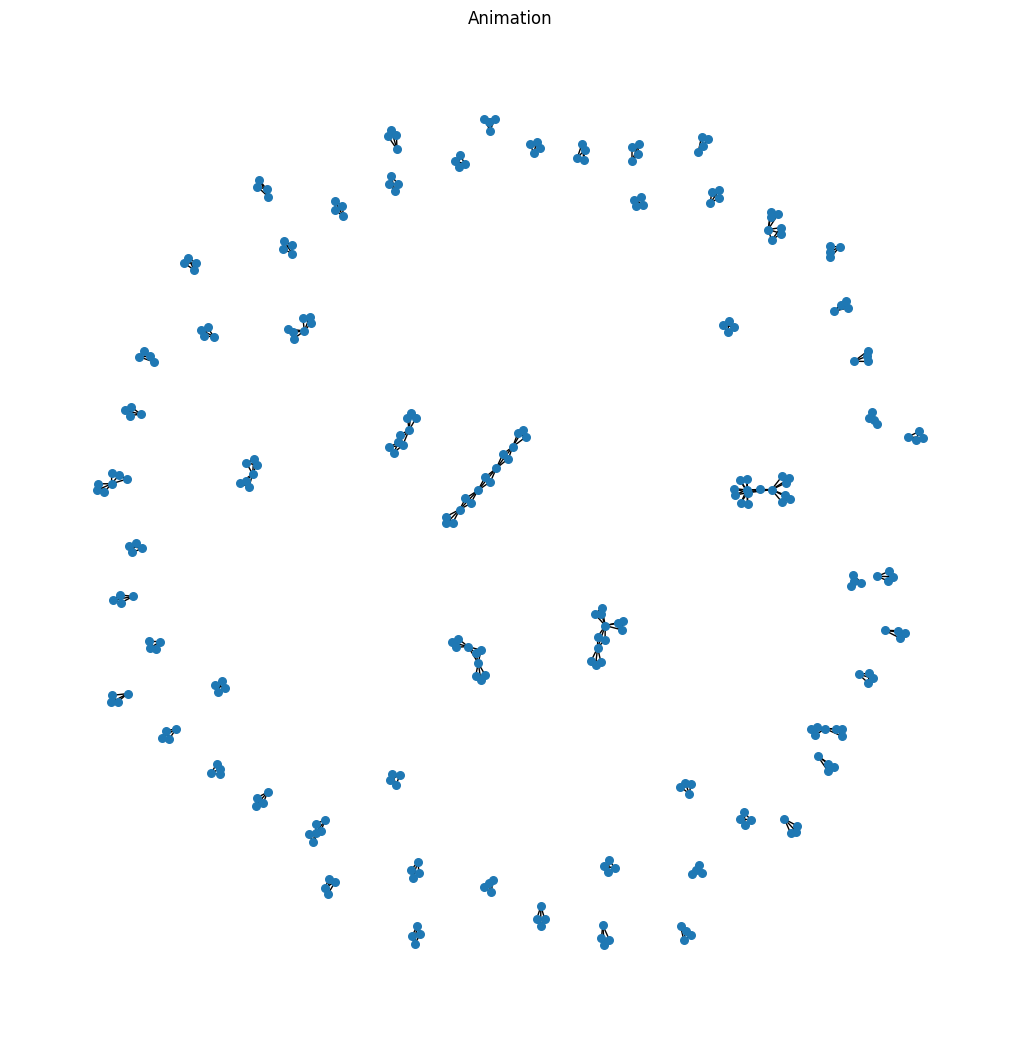

Graph Animation - Number of movies: 82
Graph Animation - Number of nodes: 301
Graph Animation - Number of edges: 487


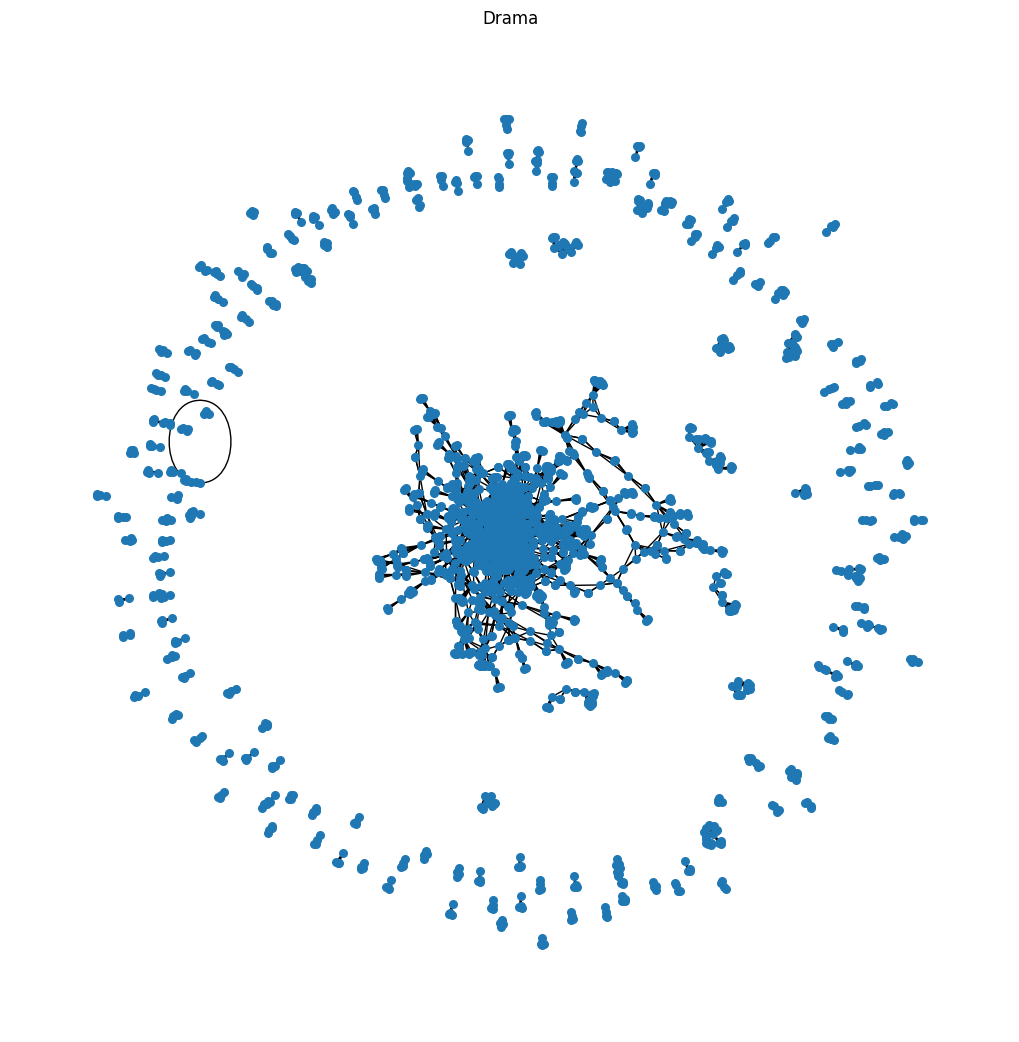

Graph Drama - Number of movies: 724
Graph Drama - Number of nodes: 2086
Graph Drama - Number of edges: 4276


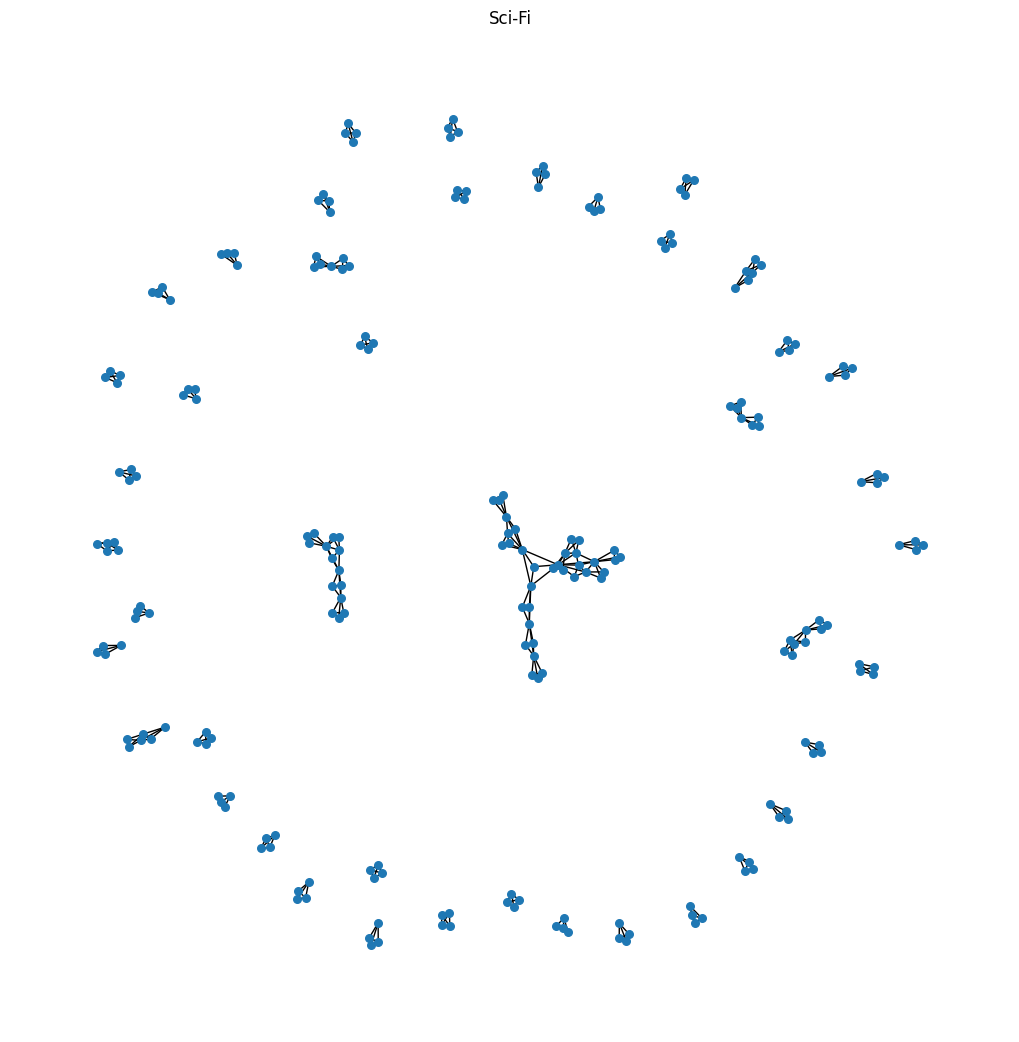

Graph Sci-Fi - Number of movies: 67
Graph Sci-Fi - Number of nodes: 231
Graph Sci-Fi - Number of edges: 387


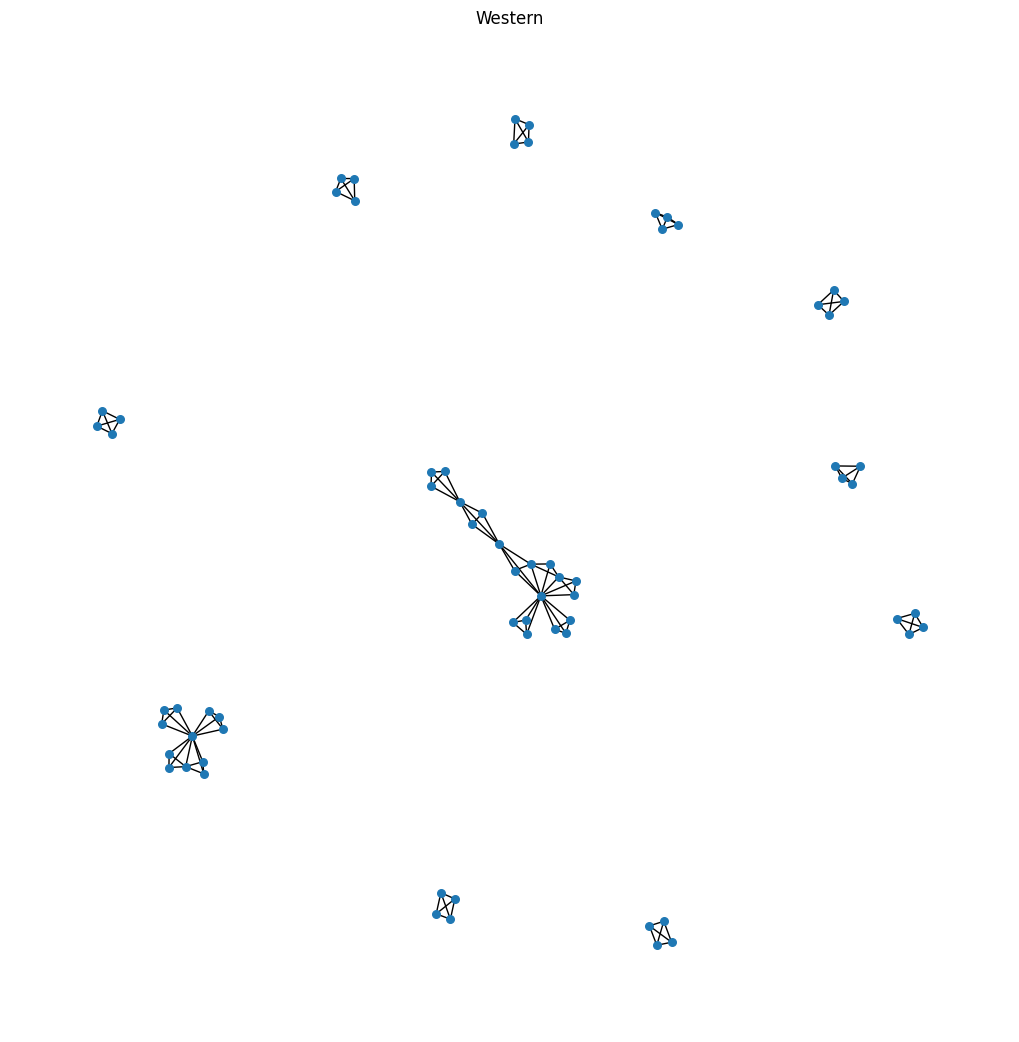

Graph Western - Number of movies: 20
Graph Western - Number of nodes: 68
Graph Western - Number of edges: 117


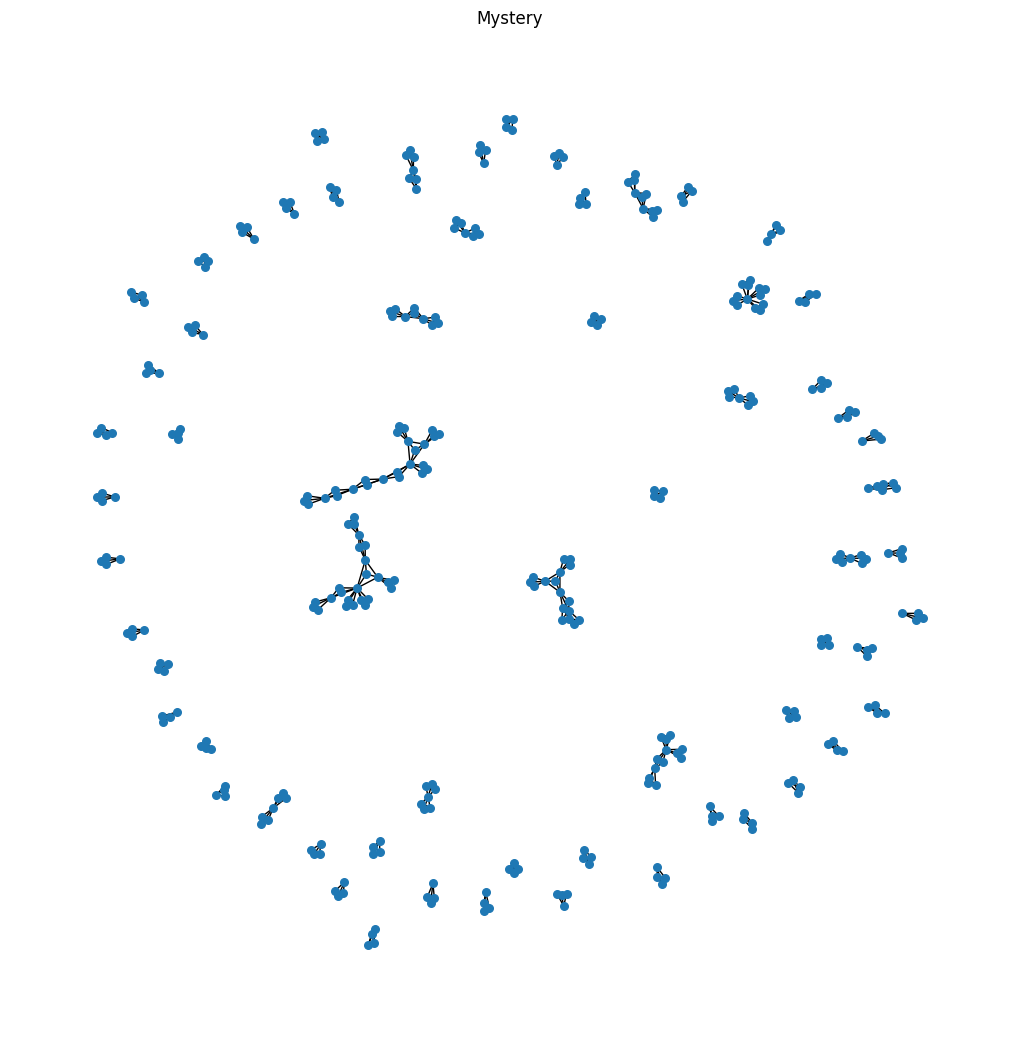

Graph Mystery - Number of movies: 99
Graph Mystery - Number of nodes: 357
Graph Mystery - Number of edges: 591


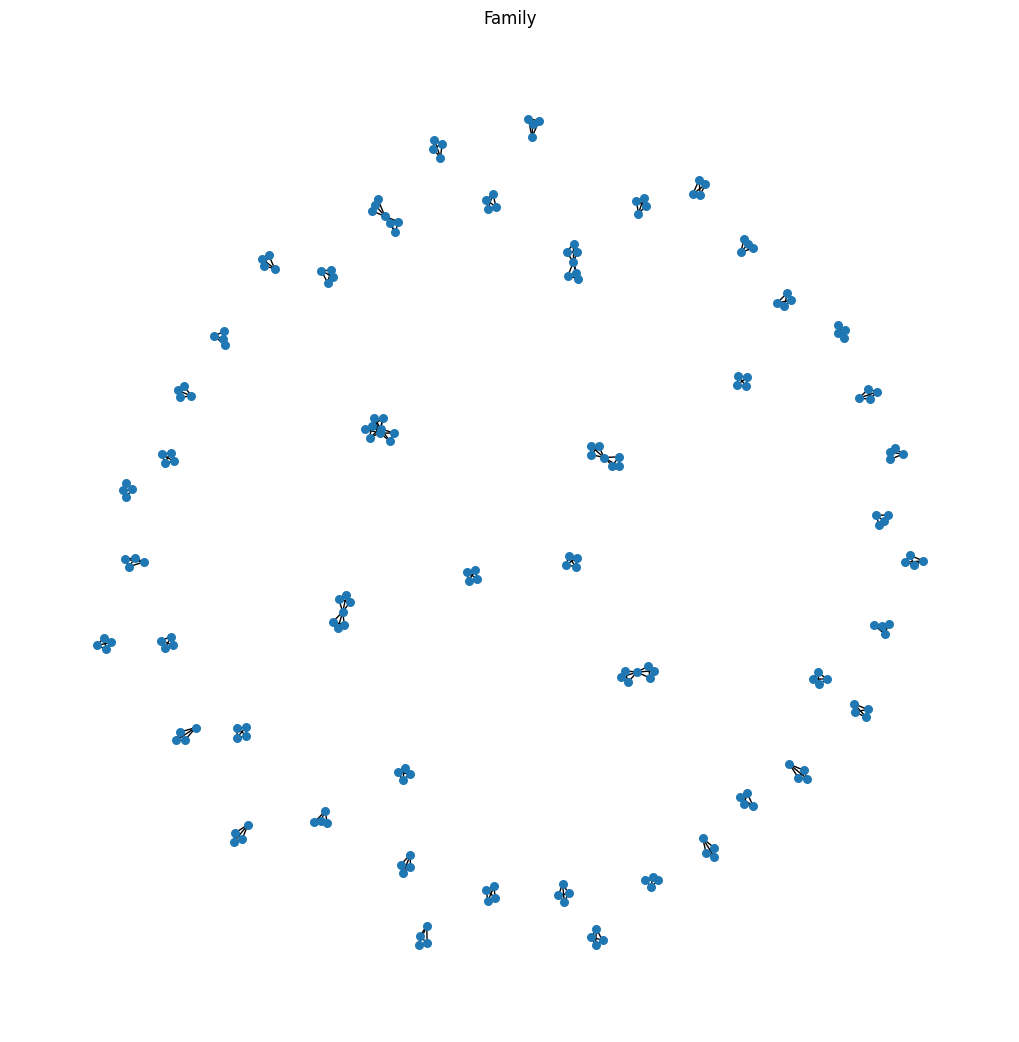

Graph Family - Number of movies: 56
Graph Family - Number of nodes: 208
Graph Family - Number of edges: 326


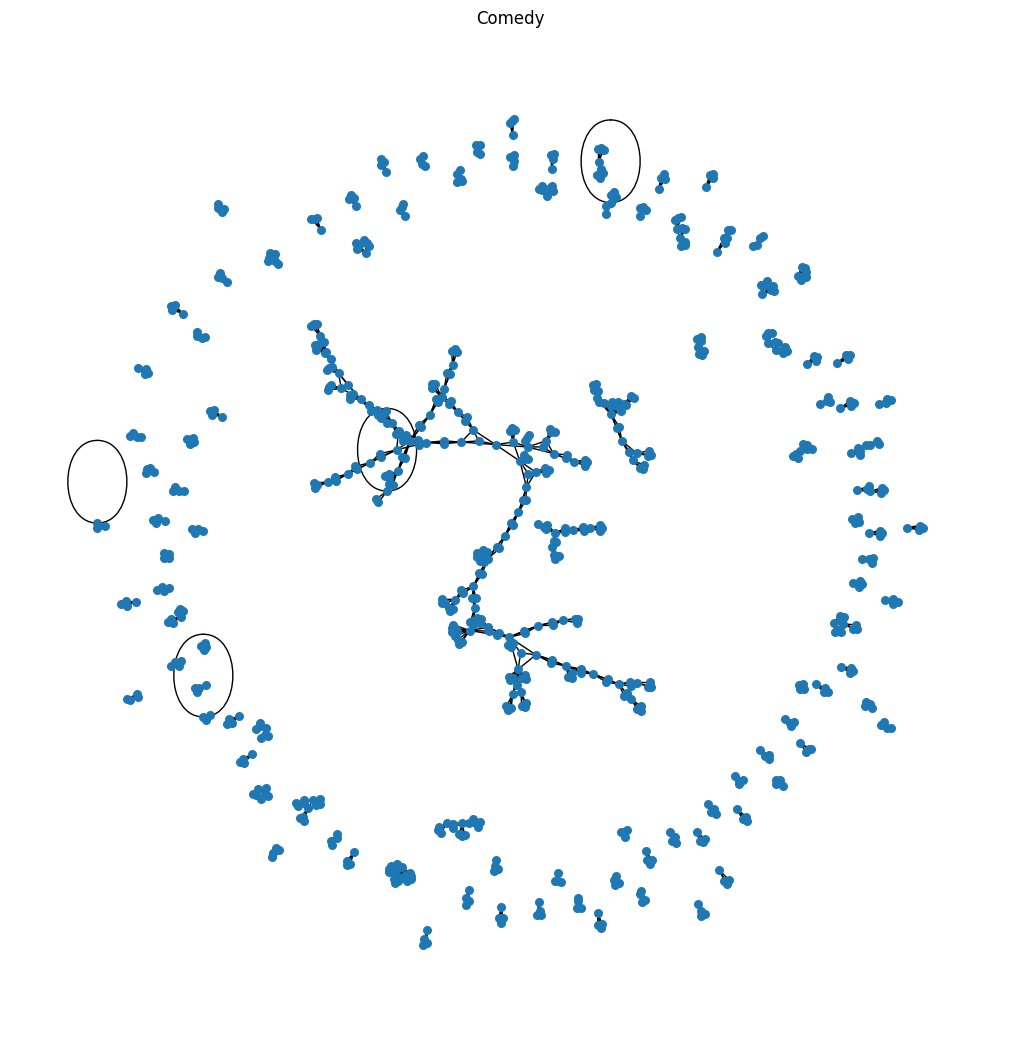

Graph Comedy - Number of movies: 233
Graph Comedy - Number of nodes: 775
Graph Comedy - Number of edges: 1361


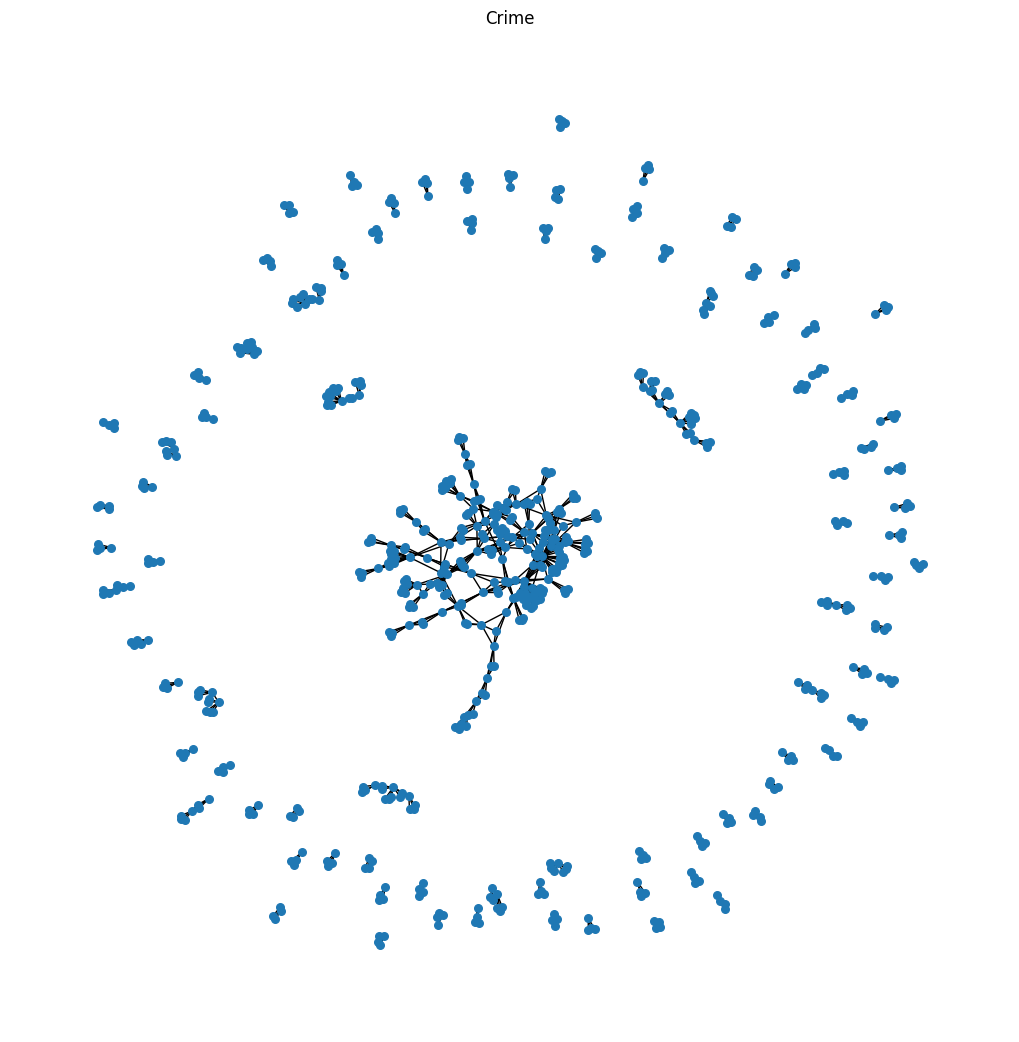

Graph Crime - Number of movies: 209
Graph Crime - Number of nodes: 686
Graph Crime - Number of edges: 1231


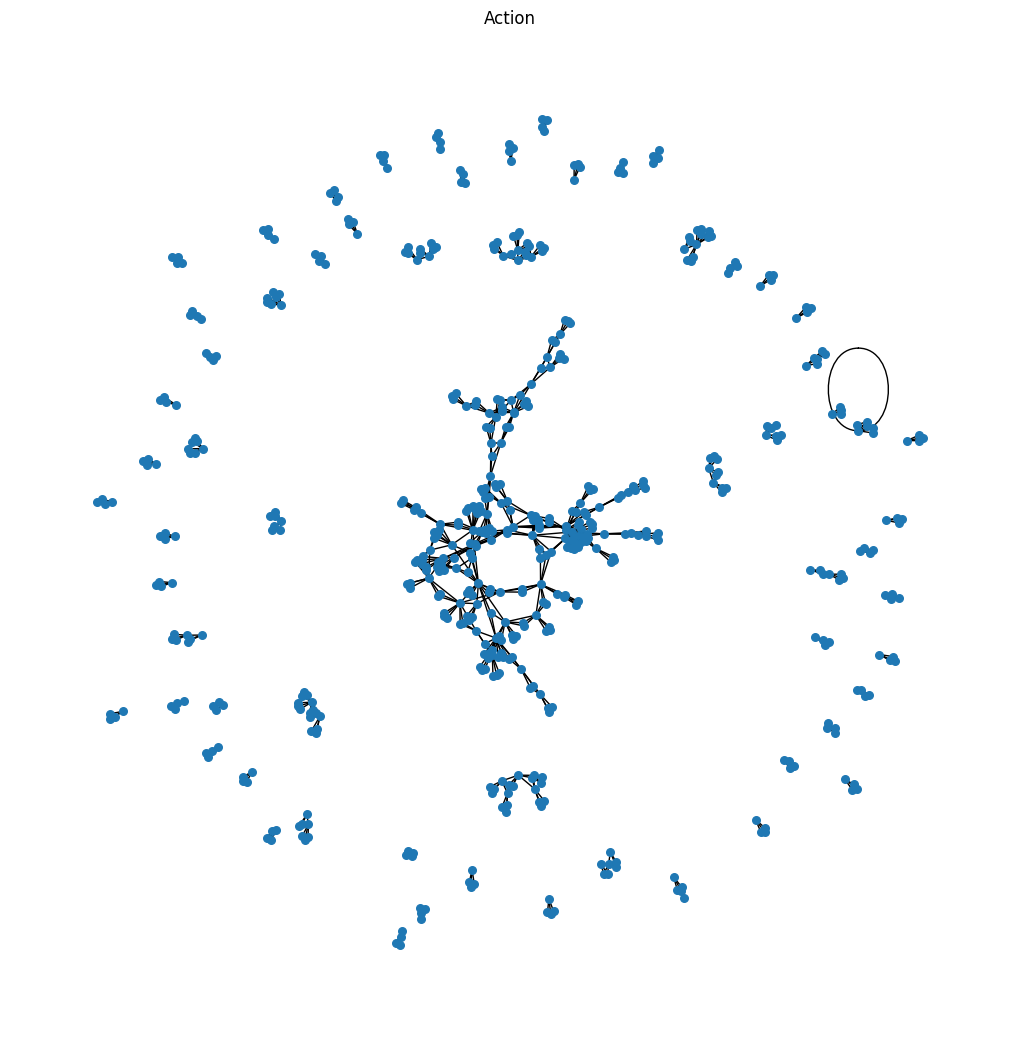

Graph Action - Number of movies: 189
Graph Action - Number of nodes: 586
Graph Action - Number of edges: 1077


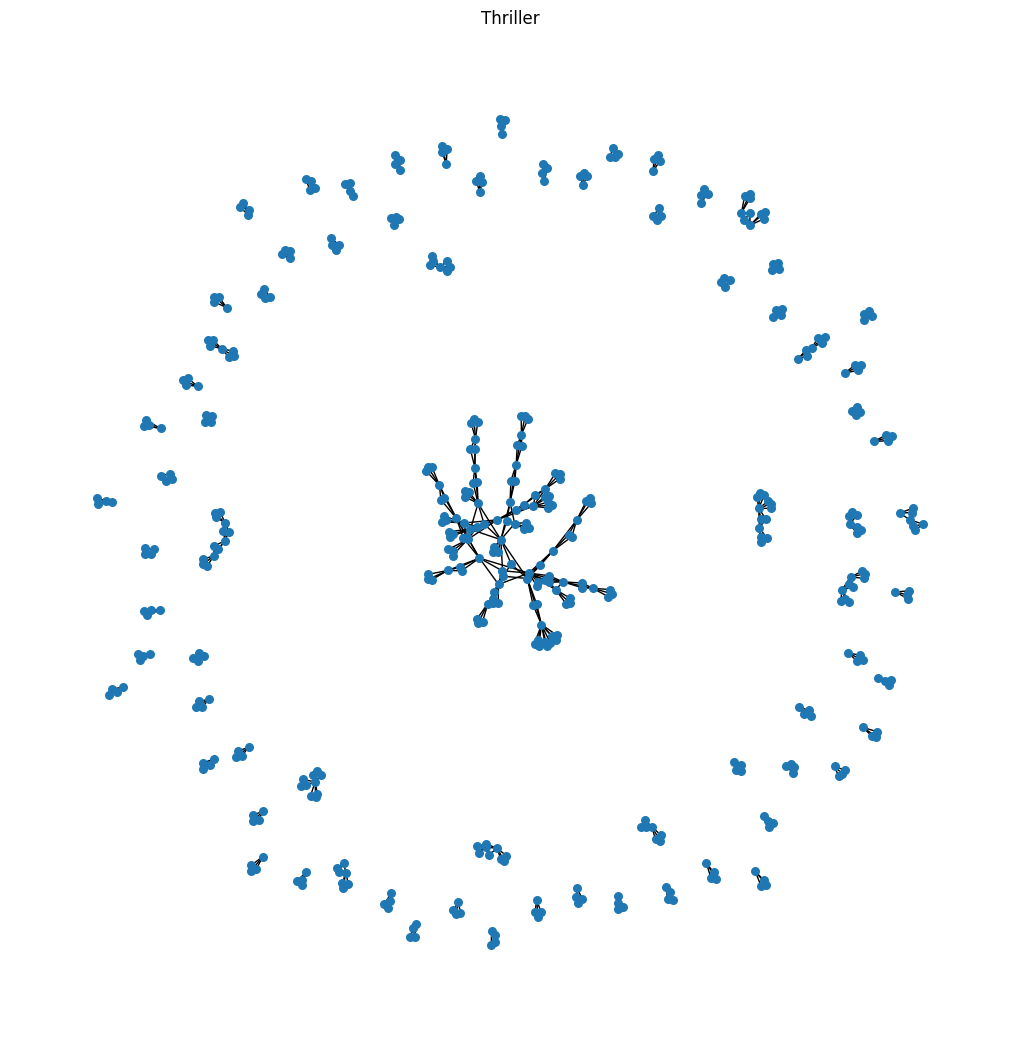

Graph Thriller - Number of movies: 137
Graph Thriller - Number of nodes: 480
Graph Thriller - Number of edges: 817


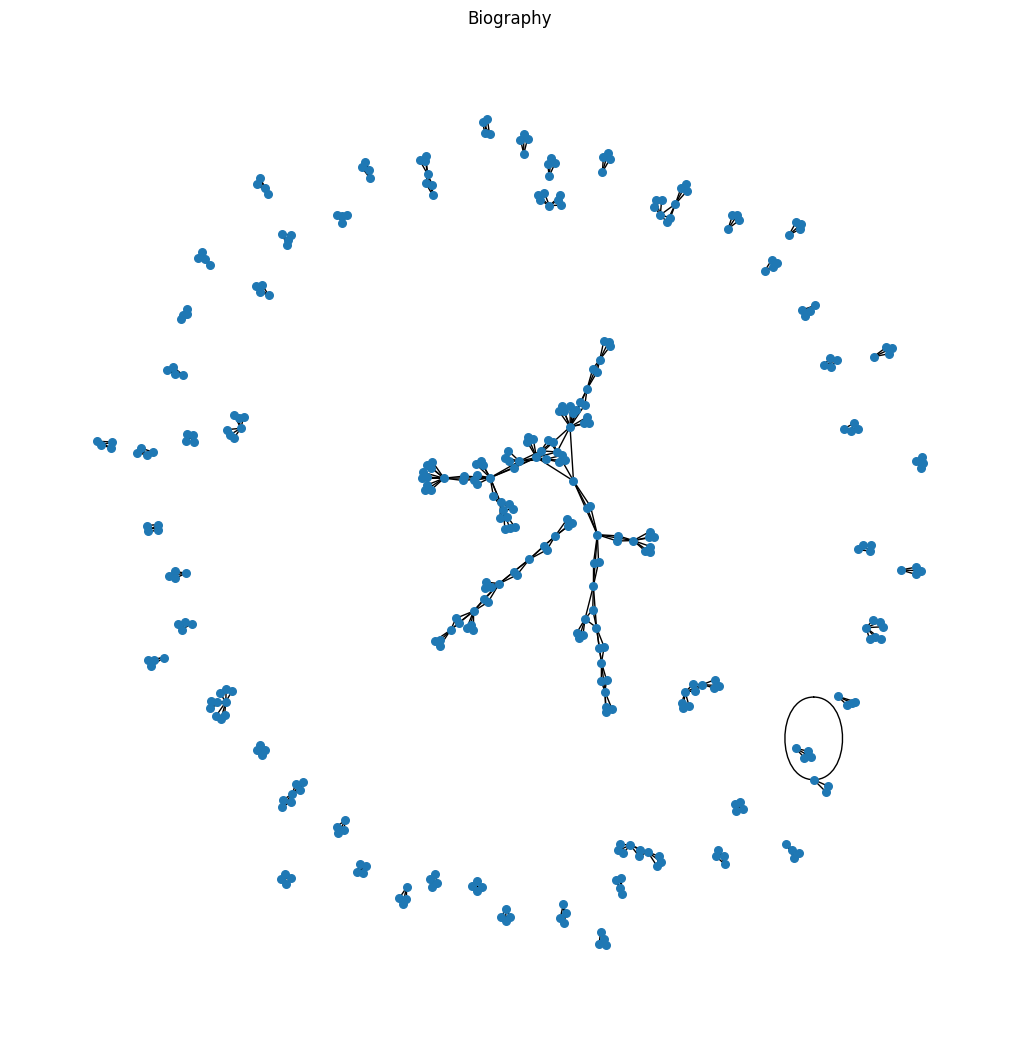

Graph Biography - Number of movies: 109
Graph Biography - Number of nodes: 379
Graph Biography - Number of edges: 649


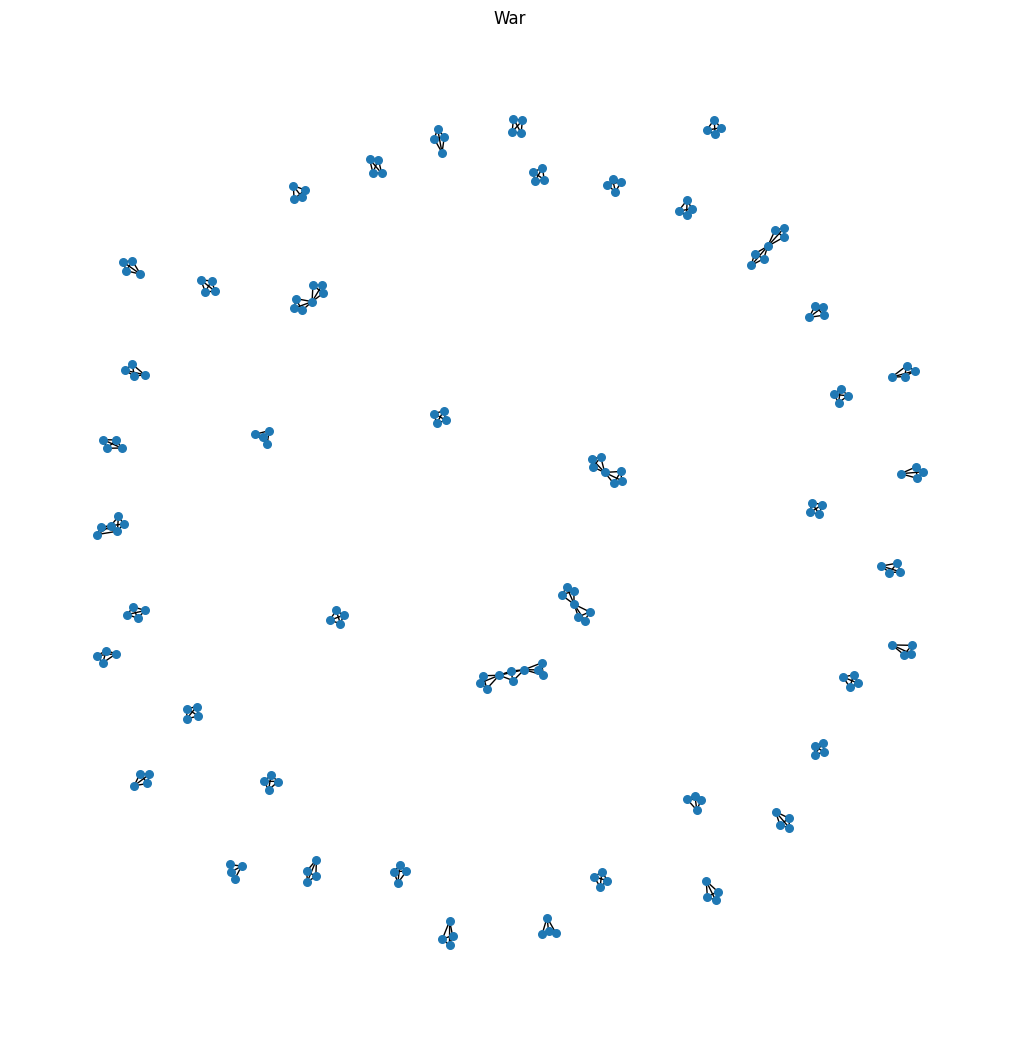

Graph War - Number of movies: 51
Graph War - Number of nodes: 196
Graph War - Number of edges: 305


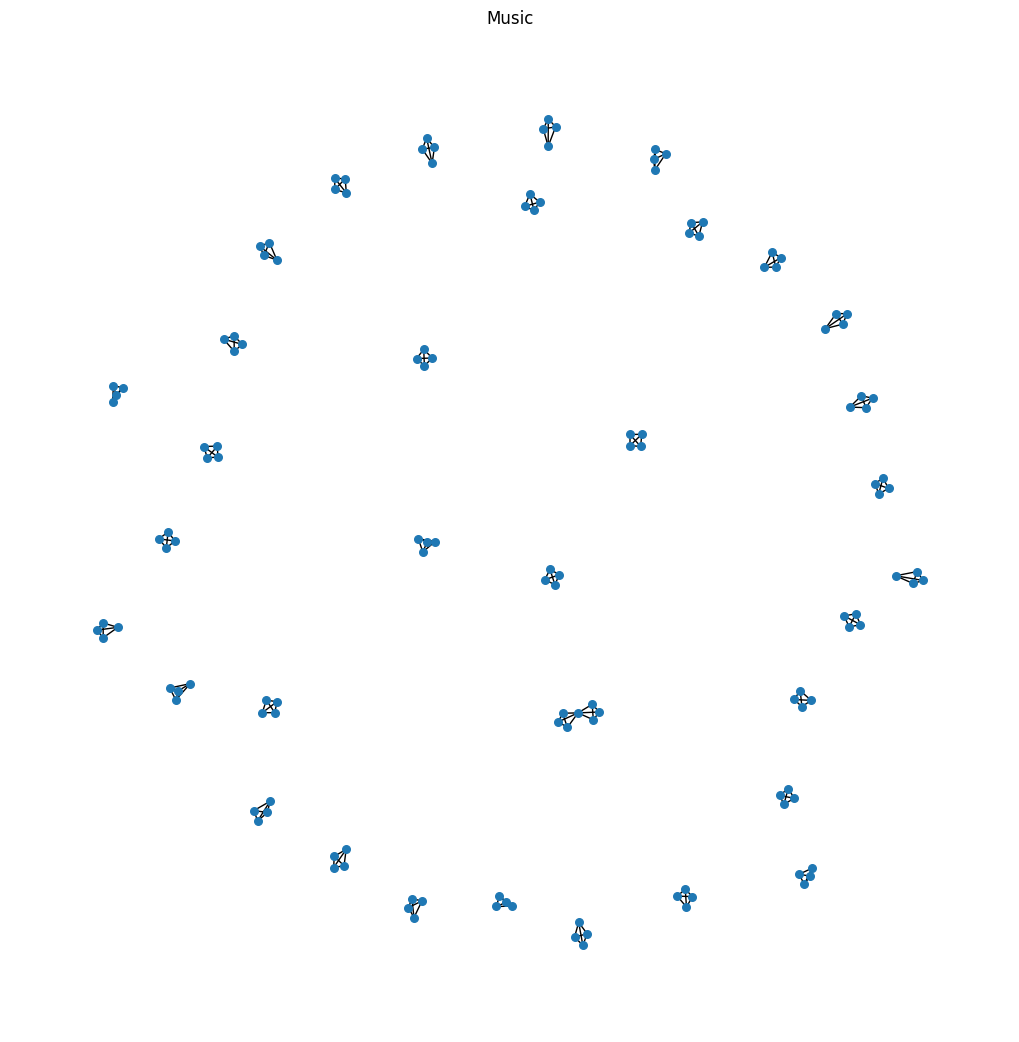

Graph Music - Number of movies: 35
Graph Music - Number of nodes: 139
Graph Music - Number of edges: 210


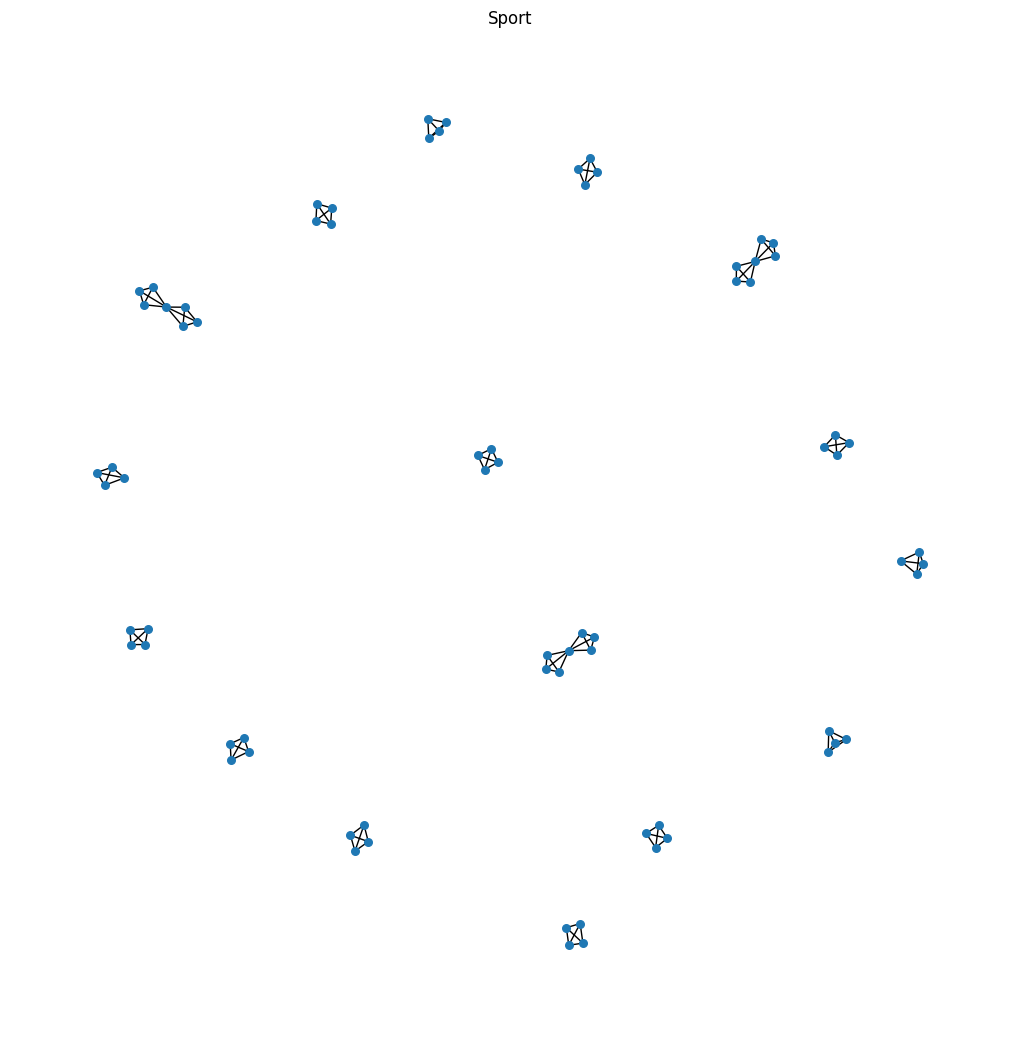

Graph Sport - Number of movies: 19
Graph Sport - Number of nodes: 73
Graph Sport - Number of edges: 114


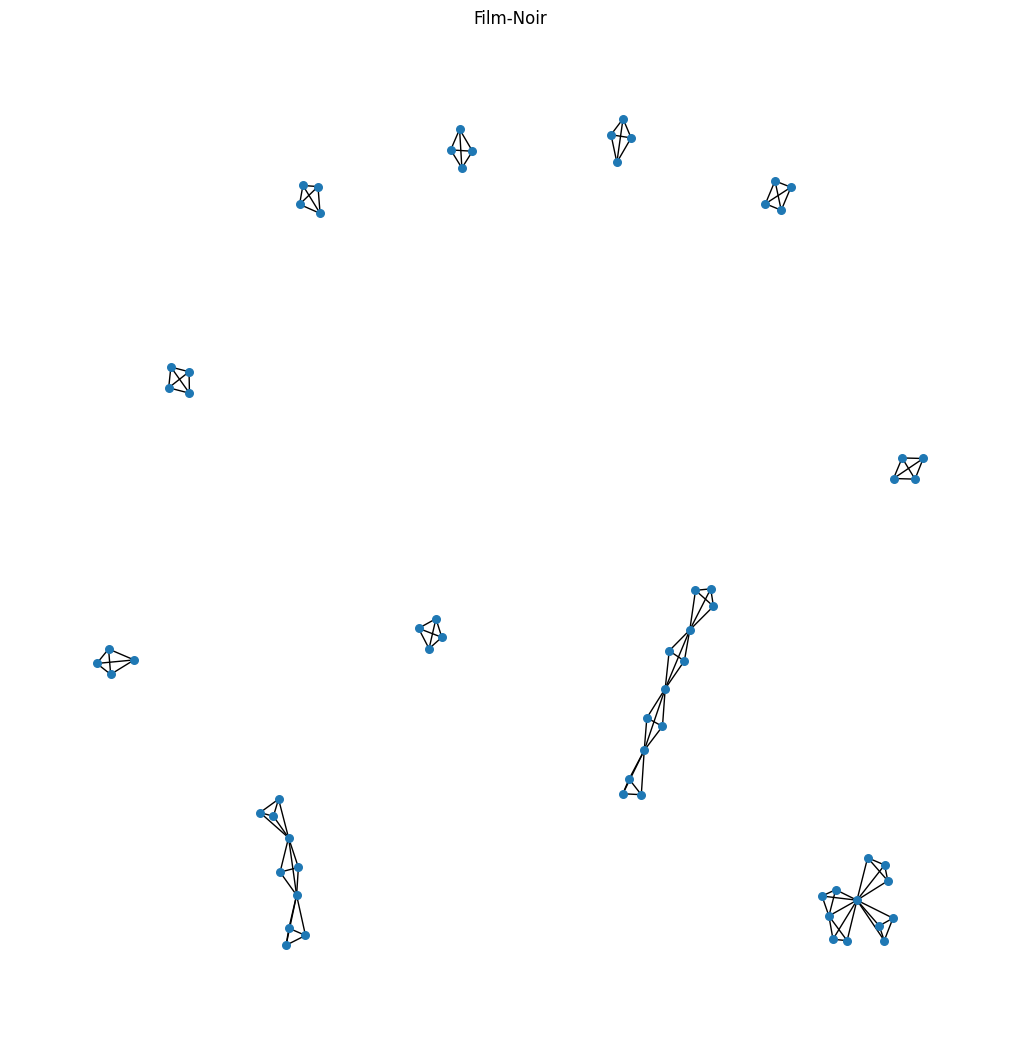

Graph Film-Noir - Number of movies: 19
Graph Film-Noir - Number of nodes: 67
Graph Film-Noir - Number of edges: 113


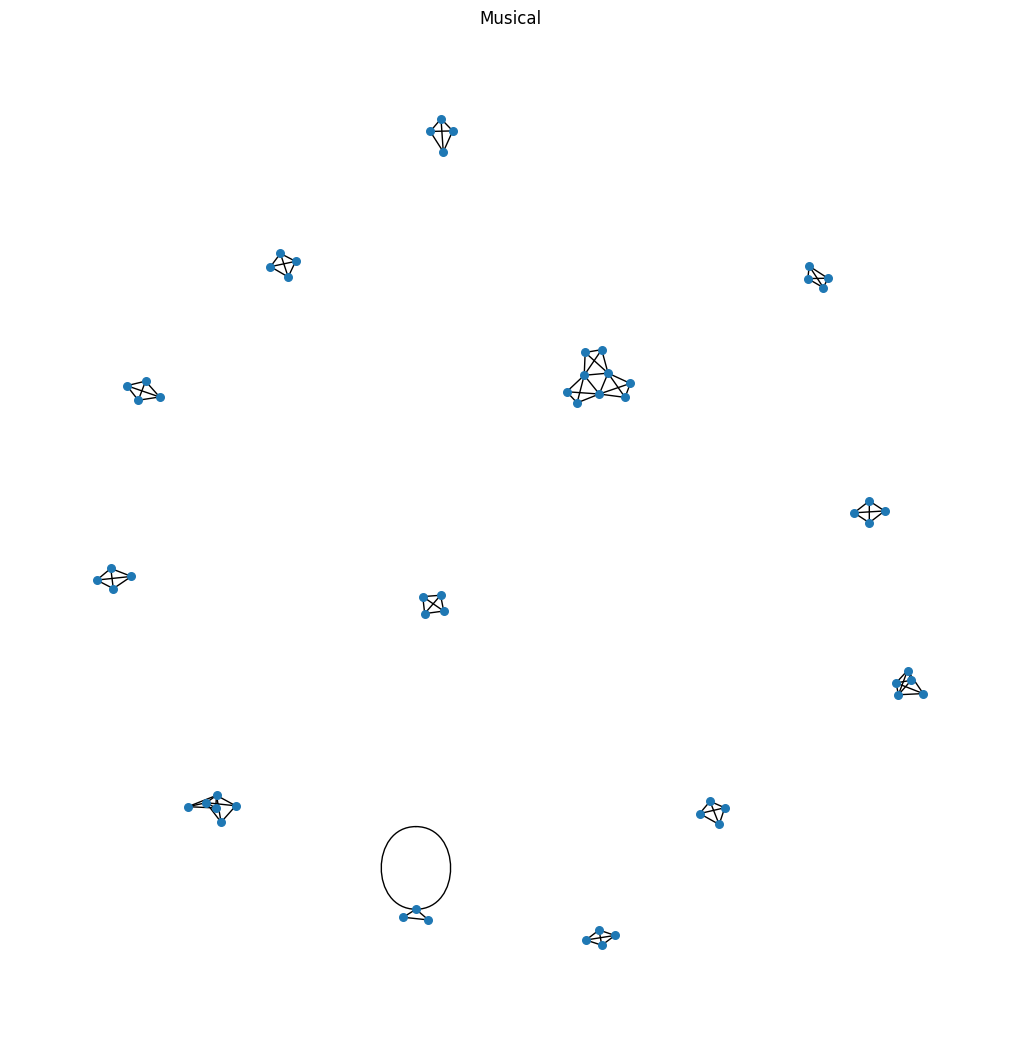

Graph Musical - Number of movies: 17
Graph Musical - Number of nodes: 59
Graph Musical - Number of edges: 96


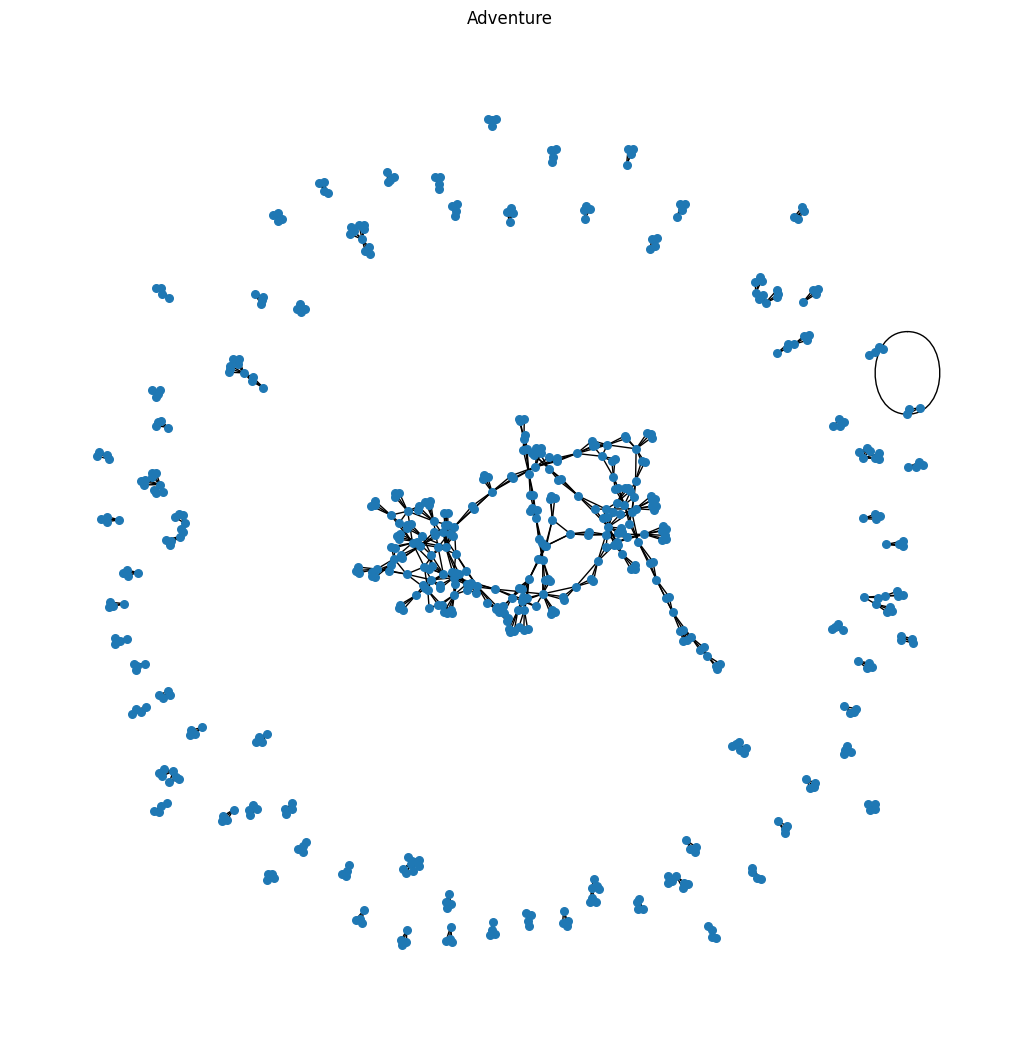

Graph Adventure - Number of movies: 196
Graph Adventure - Number of nodes: 609
Graph Adventure - Number of edges: 1108


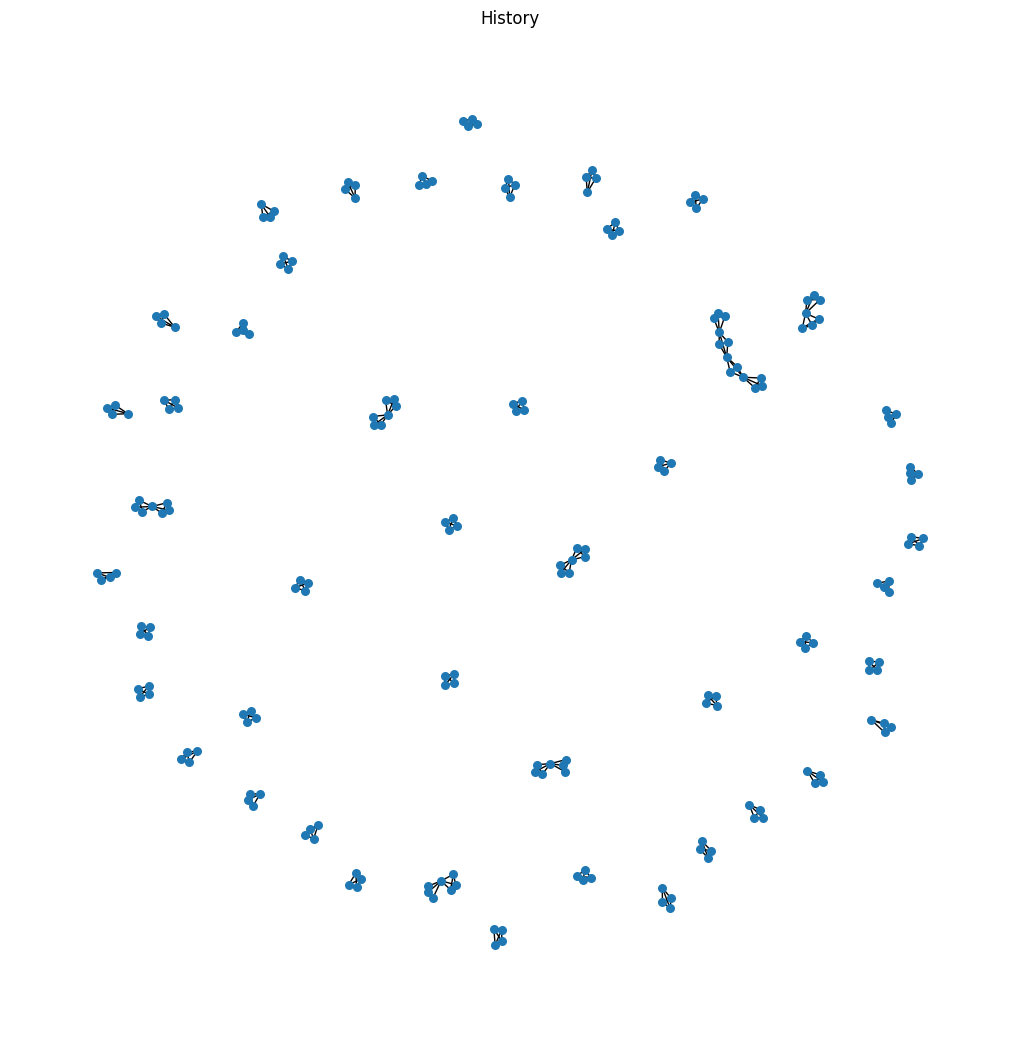

Graph History - Number of movies: 56
Graph History - Number of nodes: 215
Graph History - Number of edges: 336


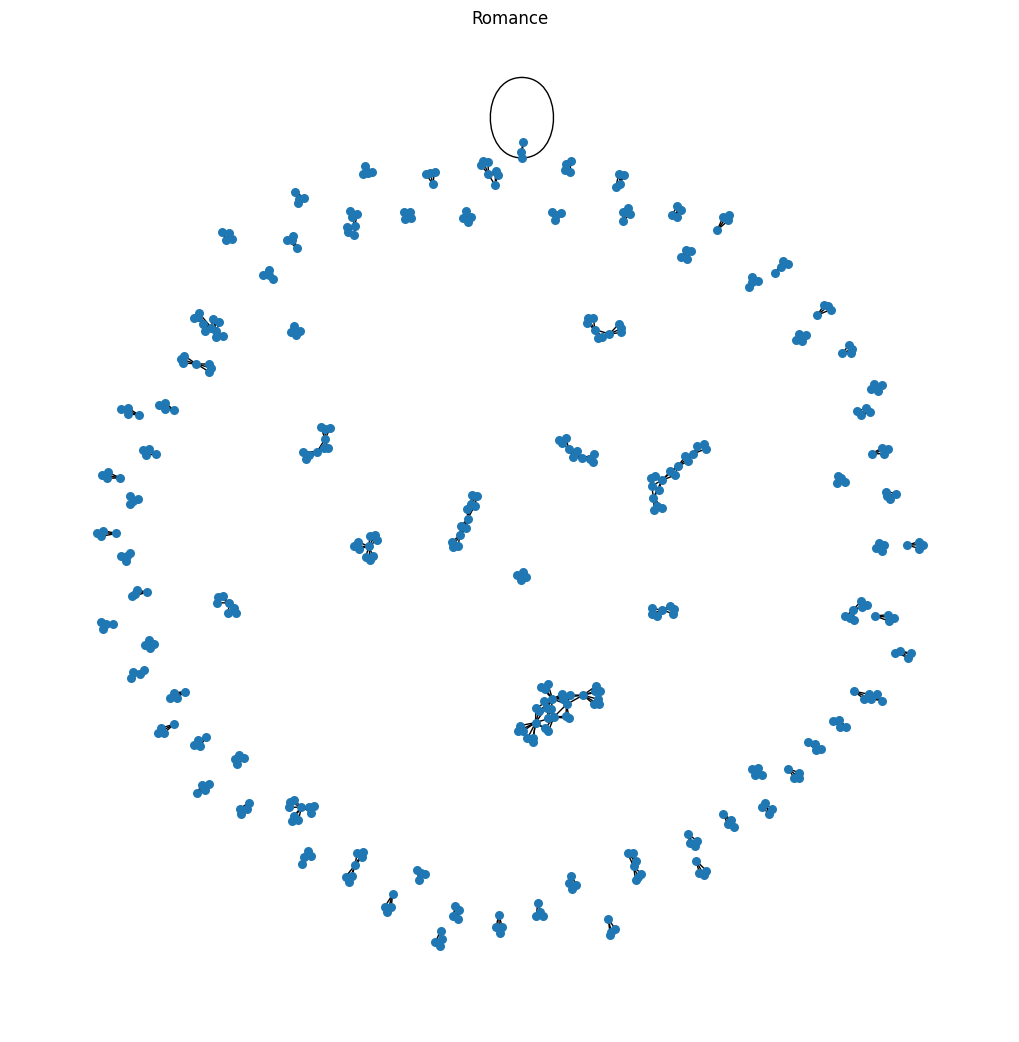

Graph Romance - Number of movies: 125
Graph Romance - Number of nodes: 449
Graph Romance - Number of edges: 741


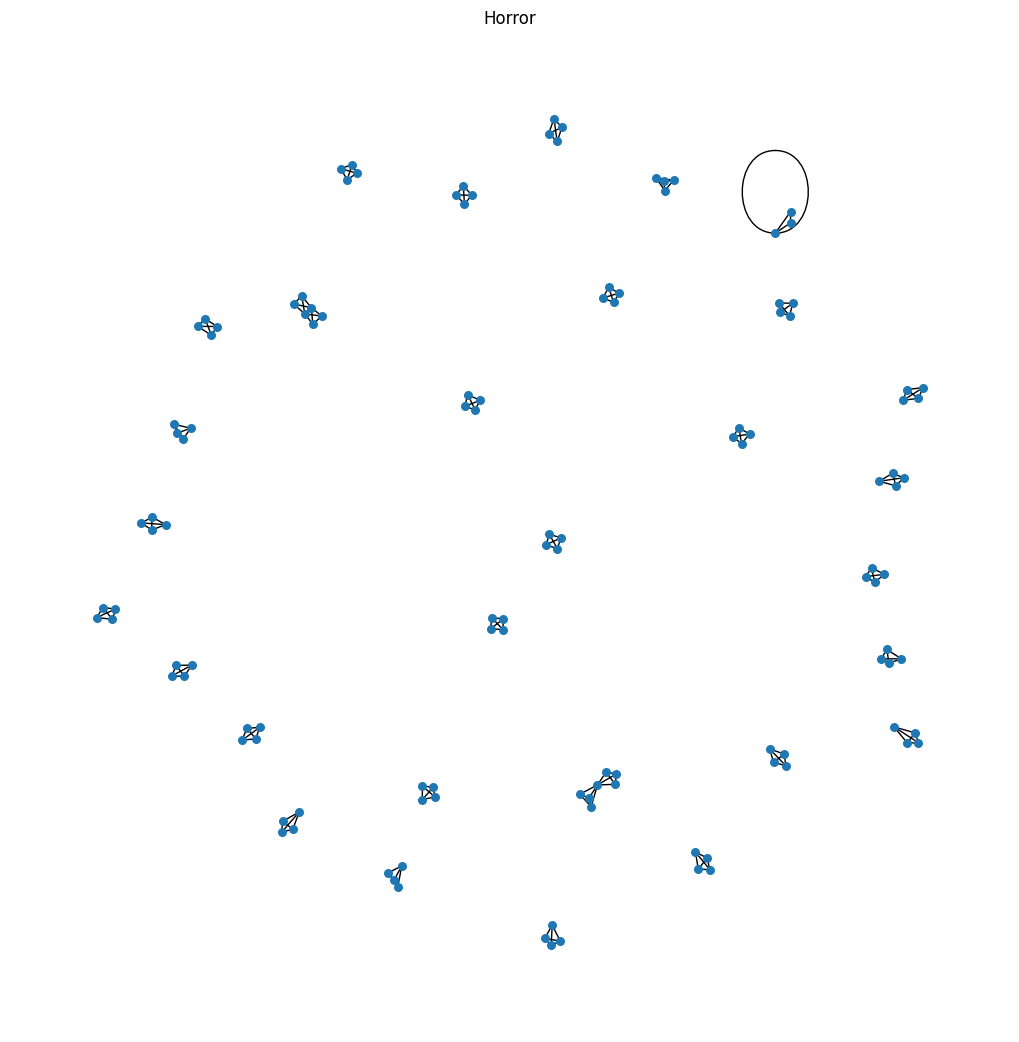

Graph Horror - Number of movies: 32
Graph Horror - Number of nodes: 124
Graph Horror - Number of edges: 189


In [17]:
import matplotlib.pyplot as plt

for genre, G in graphs:
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=30)
    plt.title(genre)
    plt.show()
    print(f"Graph {genre} - Number of movies: {nb_movies_per_genre[genre]}")
    print(f"Graph {genre} - Number of nodes: {G.number_of_nodes()}")
    print(f"Graph {genre} - Number of edges: {G.number_of_edges()}")

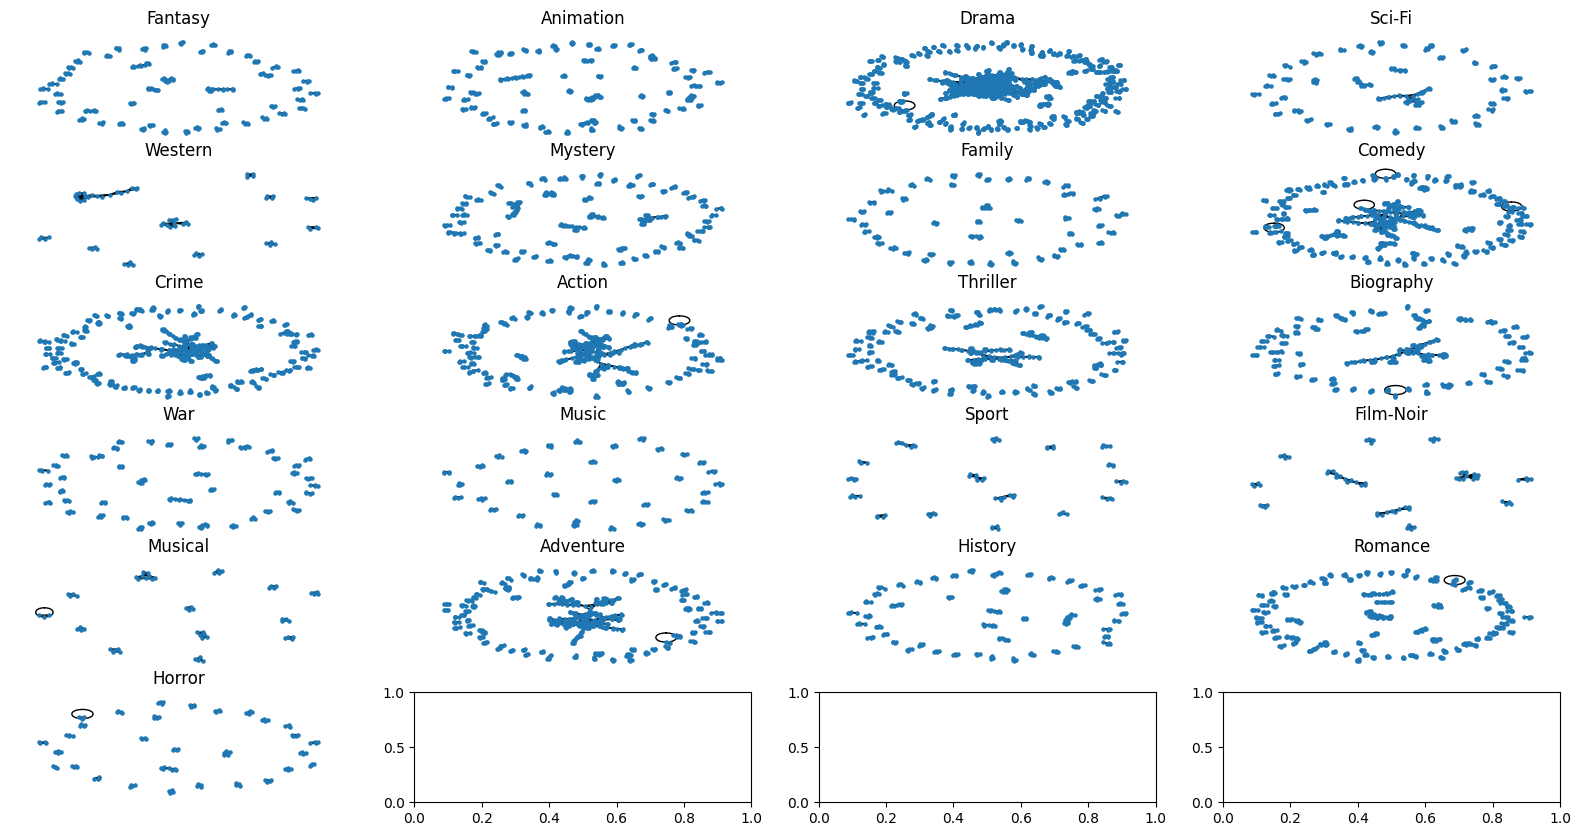

In [22]:
# Display all the graphs next to each other like a mosaic
import matplotlib.pyplot as plt

fig, axs = plt.subplots(6, 4, figsize=(20, 10))
for i, (genre, G) in enumerate(graphs):
    row = i // 4
    col = i % 4
    pos = nx.spring_layout(G)
    axs[row, col].set_title(genre)
    nx.draw(G, pos, with_labels=False, node_size=5, ax=axs[row, col])
plt.show()

### Sauvegarder tous les graphes

In [23]:
for genre, G in graphs:
    nx.write_graphml(G, f'../graphs/graphs_genres_actors/actors_{genre}.graphml')

# Prédiction de lien (note d'un film selon deux acteurs)

## Sur IMDB Small

In [2]:
distinct_genres = set()
for index, row in df.iterrows():
    genres = row['Genre'].split(',')
    for genre in genres:
        distinct_genres.add(genre.strip())

In [3]:
import networkx as nx

graphs = []

nb_movies_per_genre = {}

for genre in distinct_genres:
    nb_movies_per_genre[genre] = 0
    G = nx.Graph()
    for index, row in df.iterrows():
        if genre in [g.strip() for g in row['Genre'].split(',')]:
            nb_movies_per_genre[genre] += 1

            stars = [row['Star1'], row['Star2'], row['Star3'], row['Star4']]
            rating = row['IMDB_Rating']

            for i in range(len(stars)):
                for j in range(i + 1, len(stars)):
                    if pd.notna(stars[i]) and pd.notna(stars[j]):
                        if G.has_edge(stars[i], stars[j]):
                            G[stars[i]][stars[j]]['weight'].append(rating)
                        else:
                            G.add_edge(stars[i], stars[j], weight=[rating])


    graphs.append((genre, G))

In [8]:
print(graphs)

[('Romance', <networkx.classes.graph.Graph object at 0x75bcb91716f0>), ('Mystery', <networkx.classes.graph.Graph object at 0x75bcb9170340>), ('Sci-Fi', <networkx.classes.graph.Graph object at 0x75bcc40d35e0>), ('Thriller', <networkx.classes.graph.Graph object at 0x75bcacdda3e0>), ('Adventure', <networkx.classes.graph.Graph object at 0x75bcda5875e0>), ('History', <networkx.classes.graph.Graph object at 0x75bcac92d510>), ('War', <networkx.classes.graph.Graph object at 0x75bcac92f4f0>), ('Sport', <networkx.classes.graph.Graph object at 0x75bcac92f5e0>), ('Western', <networkx.classes.graph.Graph object at 0x75bcac92f5b0>), ('Animation', <networkx.classes.graph.Graph object at 0x75bcb91b8bb0>), ('Action', <networkx.classes.graph.Graph object at 0x75bcb9171900>), ('Fantasy', <networkx.classes.graph.Graph object at 0x75bcdc33be20>), ('Film-Noir', <networkx.classes.graph.Graph object at 0x75bcb9172b90>), ('Family', <networkx.classes.graph.Graph object at 0x75bcda587430>), ('Musical', <networkx

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

drama_graph = [g for g in graphs if g[0] == 'Drama'][0][1]

# Calculer la note moyenne pour chaque arête et créer le dataset
data = []
for u, v, d in drama_graph.edges(data=True):
    d['weight'] = sum(d['weight']) / len(d['weight'])
    data.append((u, v, d['weight']))

df = pd.DataFrame(data, columns=['Actor1', 'Actor2', 'Rating'])

# Utiliser des identifiants numériques pour les acteurs
df['Actor1_id'] = df['Actor1'].astype('category').cat.codes
df['Actor2_id'] = df['Actor2'].astype('category').cat.codes

# Features: identifiants des acteurs
X = df[['Actor1_id', 'Actor2_id']]
# Target: notes des films
y = df['Rating']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Entraîner un modèle de régression linéaire
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = linreg.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.07996714536161892


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Entraîner un modèle Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = rfr.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.07788522360786336


In [12]:
# Prédire la note d'un film avec les acteurs Tom Hanks et Robert De Niro
actor1 = 'Tom Hanks'
actor2 = 'Robert De Niro'
actor1_id = df['Actor1'].astype('category').cat.categories.get_loc(actor1)
actor2_id = df['Actor2'].astype('category').cat.categories.get_loc(actor2)

rating1 = linreg.predict([[actor1_id, actor2_id]])[0]
rating2 = rfr.predict([[actor1_id, actor2_id]])[0]

print(f'Predicted rating with Linear Regression: {rating1}')
print(f'Predicted rating with Random Forest Regressor: {rating2}')

Predicted rating with Linear Regression: 7.97896027514559
Predicted rating with Random Forest Regressor: 7.774000000000012


/home/thomas/Documents/EPITA/Graph Machine Learning/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/thomas/Documents/EPITA/Graph Machine Learning/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Sur IMDB Large Filtered

In [24]:
# Load the smaller IMDb dataset
actors_actresses = pd.read_csv('./data/IMDB_Filtered/actors_actresses.csv')
filtered_movies = pd.read_csv('./data/IMDB_Filtered/filtered_movies.csv')
filtered_ratings = pd.read_csv('./data/IMDB_Filtered/filtered_ratings.csv')

# Merge filtered_ratings with filtered_movies to have a single dataframe with movie details and ratings
movies_with_ratings = pd.merge(filtered_movies, filtered_ratings, on='tconst')

# Filter for movies where the genre is Drama
drama_movies = movies_with_ratings[movies_with_ratings['genres'].str.contains('Drama', na=False)]

In [25]:
# Initialize the graph
G = nx.Graph()

# Filter actors_actresses to include only the movies in drama_movies
drama_actors_actresses = actors_actresses[actors_actresses['tconst'].isin(drama_movies['tconst'])]

# Iterate over the drama movies and their ratings
for tconst, movie_group in drama_actors_actresses.groupby('tconst'):
    # Get the rating of the movie
    average_rating = drama_movies[drama_movies['tconst'] == tconst]['averageRating_x'].values[0]

    # Get the list of actors in this movie
    actors = movie_group['nconst'].tolist()

    # Add edges between each pair of actors with the rating as the weight
    for actor1, actor2 in itertools.combinations(actors, 2):
        if G.has_edge(actor1, actor2):
            # If the edge already exists, append the rating to the list
            G[actor1][actor2]['weight'].append(average_rating)
        else:
            # If the edge does not exist, create it with the rating as a list
            G.add_edge(actor1, actor2, weight=[average_rating])

# Calculate the average rating for each edge
for u, v, d in G.edges(data=True):
    d['weight'] = sum(d['weight']) / len(d['weight'])

In [31]:
# Prepare data for regression
data = []
for u, v, d in G.edges(data=True):
    data.append((u, v, d['weight']))

df = pd.DataFrame(data, columns=['Actor1', 'Actor2', 'Rating'])

# Combine Actor1 and Actor2 columns to get a unique list of actors
unique_actors = pd.concat([df['Actor1'], df['Actor2']]).unique()
actor_mapping = {actor: idx for idx, actor in enumerate(unique_actors)}

# Apply the mapping to get numerical IDs for actors
df['Actor1_id'] = df['Actor1'].map(actor_mapping)
df['Actor2_id'] = df['Actor2'].map(actor_mapping)

# Features: actor ids
X = df[['Actor1_id', 'Actor2_id']]
# Target: movie ratings
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
print(len(X_train))

703640


In [33]:
# Train a linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict on the test set
y_pred = linreg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with Linear Regression: {mse}')

Mean Squared Error with Linear Regression: 0.9362054931170534


In [34]:
from sklearn.linear_model import ElasticNet

# Train an Elastic Net model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Predict on the test set
y_pred = elastic_net.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with Elastic Net: {mse}')

Mean Squared Error with Elastic Net: 0.9362053660342897


In [42]:
print("nm0000158" in list(unique_actors)) # Tom Hanks
print("nm0000134" in list(unique_actors)) # Robert De Niro
print("nm1706767" in list(unique_actors)) # Jonah Hill
print("nm0000138" in list(unique_actors)) # Leonardo DiCaprio

True
True
True
True


In [41]:
# Predict the rating of a movie with actors Tom Hanks and Robert De Niro
actor1 = 'nm0000158' # Tom Hanks
actor2 = 'nm0000134' # Robert De Niro

# Get the actor ids for Tom Hanks and Robert De Niro
actor1_id = actor_mapping.get(actor1, -1)
actor2_id = actor_mapping.get(actor2, -1)

# Check if the actors are in the mapping
if actor1_id == -1 or actor2_id == -1:
    print(f"One or both actors not found in the dataset.")
else:
    # Predict using both models
    input_data = [[actor1_id, actor2_id]]
    rating1 = linreg.predict(input_data)[0]
    rating2 = elastic_net.predict(input_data)[0]

    print(f'Predicted rating with Linear Regression: {rating1}')
    print(f'Predicted rating with Elastic Net: {rating2}')

Predicted rating with Linear Regression: 6.651542420871834
Predicted rating with Elastic Net: 6.651527817932193


/home/thomas/Documents/EPITA/Graph Machine Learning/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/thomas/Documents/EPITA/Graph Machine Learning/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


In [44]:
# Predict the rating of a movie with actors Tom Hanks and Robert De Niro
actor1 = 'nm0000158' # Tom Hanks
actor2 = 'nm0000138' # Leonardo DiCaprio

# Get the actor ids for Tom Hanks and Robert De Niro
actor1_id = actor_mapping.get(actor1, -1)
actor2_id = actor_mapping.get(actor2, -1)

# Check if the actors are in the mapping
if actor1_id == -1 or actor2_id == -1:
    print(f"One or both actors not found in the dataset.")
else:
    # Predict using both models
    input_data = [[actor1_id, actor2_id]]
    rating1 = linreg.predict(input_data)[0]
    rating2 = elastic_net.predict(input_data)[0]

    print(f'Predicted rating with Linear Regression: {rating1}')
    print(f'Predicted rating with Elastic Net: {rating2}')

Predicted rating with Linear Regression: 6.618386604951622
Predicted rating with Elastic Net: 6.618374011730691


/home/thomas/Documents/EPITA/Graph Machine Learning/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/thomas/Documents/EPITA/Graph Machine Learning/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
